# GeoPre Library Example Usage 2

This notebook demonstrates more key features of the GeoPre library for geospatial data processing.

## Imports

In [1]:
import rasterio as rio
from rasterio.plot import show
from cloud_masking import mask_clouds_S2, mask_clouds_landsat
from stacking import stack_bands

## Mask Clouds

### Sentinel 2 Examples

#### Example using the cloud probability band

('B2', 'B3', 'B4', 'B8A', 'MSK_CLDPRB')
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2495, 'height': 942, 'count': 5, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 484810.0,
       0.0, -10.0, 5000050.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


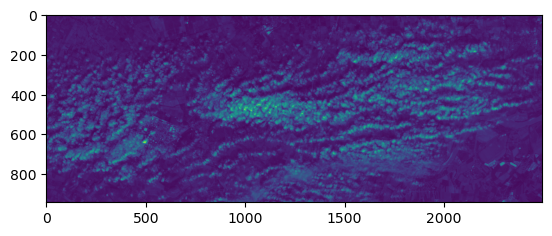

In [7]:
input_path = r'ExampleData\S2\S2_with_MSK_CLDPRB.tif'
with rio.open(input_path) as src:
    print(src.descriptions)
    print(src.profile)
    show(src.read(1))

In [8]:
masked_path = mask_clouds_S2(input_path, method='probability', threshold=15) # Mask if cloud probability > 15%

Trying with Cloud Probability Band (MSK_CLDPRB)
Cloud probability band (MSK_CLDPRB) found at index5
Cloud probability band (MSK_CLDPRB) found. Using it for cloud masking with a threshold of 15
Masked image saved to ExampleData\S2\S2_with_MSK_CLDPRB_masked.tif.


('B2', 'B3', 'B4', 'B8A', 'MSK_CLDPRB')
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 2495, 'height': 942, 'count': 5, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 484810.0,
       0.0, -10.0, 5000050.0), 'blockxsize': 2495, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


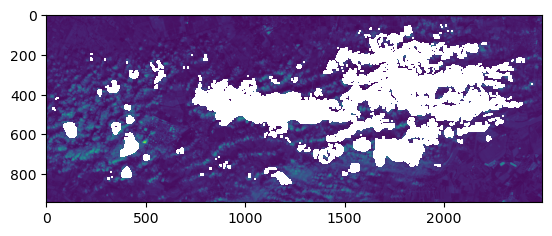

In [9]:
with rio.open(masked_path) as src:
    print(src.descriptions)
    print(src.profile)
    show(src.read(1))

#### Example using the SCL band to also mask cloud shadows

('B2', 'B3', 'B4', 'B8A', 'SCL')
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2495, 'height': 942, 'count': 5, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 484810.0,
       0.0, -10.0, 5000050.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


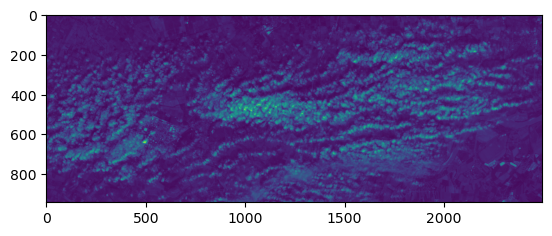

In [10]:
input_path = r'ExampleData\S2\S2_with_SCL.tif'
with rio.open(input_path) as src:
    print(src.descriptions)
    print(src.profile)
    show(src.read(1))

In [11]:
masked_path = mask_clouds_S2(input_path, method='scl', mask_shadows=True)

Trying with Scene Classification Layer (SCL)
SCL band found at index5
SCL band found. Using it for classification masking.
Masked image saved to ExampleData\S2\S2_with_SCL_masked.tif.


('B2', 'B3', 'B4', 'B8A', 'SCL')
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 2495, 'height': 942, 'count': 5, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 484810.0,
       0.0, -10.0, 5000050.0), 'blockxsize': 2495, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


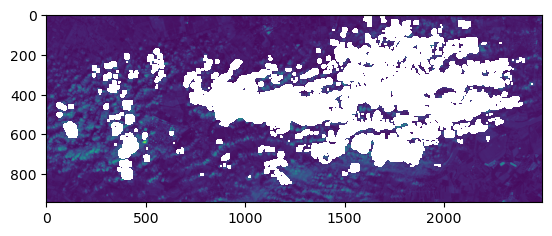

In [12]:
with rio.open(masked_path) as src:
    print(src.descriptions)
    print(src.profile)
    show(src.read(1))

#### Example using the automatic method on an image without special bands

The function tries each method and, not finding the needed special bands, at the end uses the OmniCloudMask component

('B2', 'B3', 'B4', 'B8A')
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2495, 'height': 942, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 484810.0,
       0.0, -10.0, 5000050.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


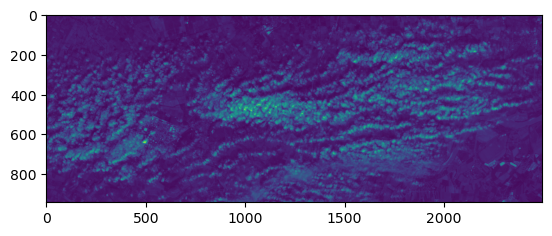

In [16]:
input_path = r'ExampleData\S2\S2_without_special.tif'
with rio.open(input_path) as src:
    print(src.descriptions)
    print(src.profile)
    show(src.read(1))

In [18]:
masked_path = mask_clouds_S2(input_path)

Trying with Cloud Probability Band (MSK_CLDPRB)
MSK_CLDPRB band not found!
Trying with Scene Classification Layer (SCL)
SCL band not found!
Attempting omnicloudmask method.
This could take a few minutes


c:\Users\matte\anaconda3\Lib\site-packages\omnicloudmask\cloud_mask.py:154: UserWarning: Patch size too large, reducing to 942 and overlap to 300.
  warnings.warn(


Masked image saved to ExampleData\S2\S2_without_special_masked.tif.


('B2', 'B3', 'B4', 'B8A')
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 2495, 'height': 942, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 484810.0,
       0.0, -10.0, 5000050.0), 'blockxsize': 2495, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


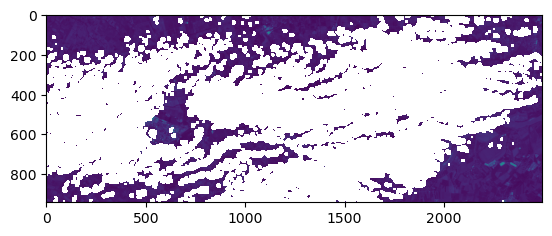

In [19]:
with rio.open(masked_path) as src:
    print(src.descriptions)
    print(src.profile)
    show(src.read(1))

### Landsat Example

('B2', 'B3', 'B4', 'B5', 'B6', 'B7')
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 1018, 'height': 580, 'count': 6, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(30.0, 0.0, 510195.0,
       0.0, -30.0, 5022015.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


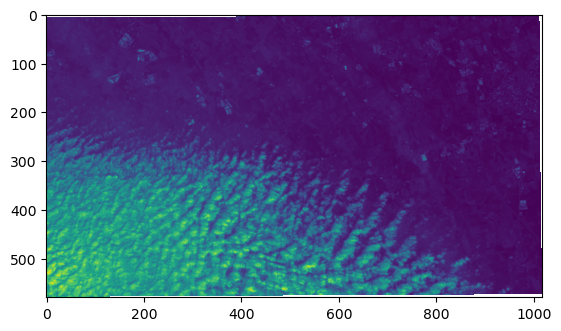

In [20]:
input_l8 = r'ExampleData\L8\L8_without_QA.tif'
with rio.open(input_l8) as src:
    print(src.descriptions)
    print(src.profile)
    show(src.read(1))

In [22]:
qa_band_path = r'ExampleData\L8\L8_QA.tif'

masked_path = mask_clouds_landsat(input_l8, method='qa', qa_pixel_path=qa_band_path)

Using QA_PIXEL mask from ExampleData\L8\L8_QA.tif
Masked image saved to ExampleData\L8\L8_without_QA_masked.tif.


('B2', 'B3', 'B4', 'B5', 'B6', 'B7')
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 1018, 'height': 580, 'count': 6, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(30.0, 0.0, 510195.0,
       0.0, -30.0, 5022015.0), 'blockxsize': 1018, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


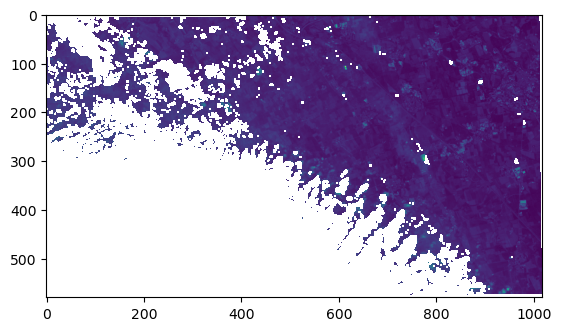

In [23]:
with rio.open(masked_path) as src:
    print(src.descriptions)
    print(src.profile)
    show(src.read(1))

## Stack Bands

In [5]:
stack_bands('test\L8_Data\L2',['B2','B3','B4','B5'], 'test\L8_Data\L2\stack_B2_B3_B4_B5.tif')

Stacked raster saved at test\L8_Data\L2\stack_B2_B3_B4_B5.tif


'test\\L8_Data\\L2\\stack_B2_B3_B4_B5.tif'

In [3]:
stack_bands('test\L8_Data\L2',['stack_B2_B3_B4_B5','QA_PIXEL'],'test\L8_Data\L2\stack_B2_B3_B4_B5_QA.tif')

Stacked raster saved at test\L8_Data\L2\stack_B2_B3_B4_B5_QA.tif


('B2', 'B3', 'B4', 'B5')
<bound method DatasetBase.tags of <open DatasetReader name='test\L8_Data\L2\stack_B2_B3_B4_B5.tif' mode='r'>>
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7731, 'height': 7841, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(30.0, 0.0, 499185.0,
       0.0, -30.0, 5215515.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate',

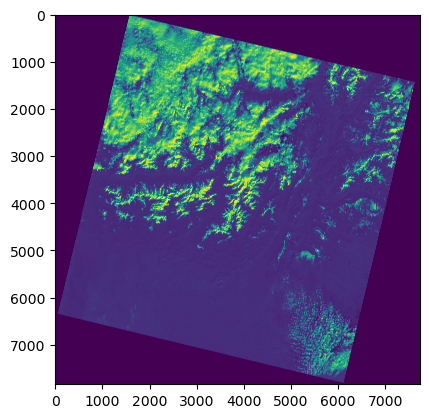

('B2', 'B3', 'B4', 'B5', 'QA_PIXEL')
<bound method DatasetBase.tags of <open DatasetReader name='test\L8_Data\L2\stack_B2_B3_B4_B5_QA.tif' mode='r'>>
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7731, 'height': 7841, 'count': 5, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(30.0, 0.0, 499185.0,
       0.0, -30.0, 5215515.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compre

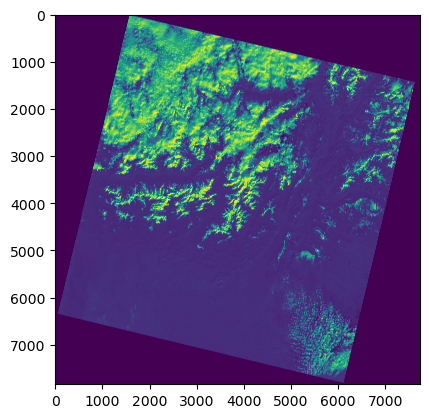

In [2]:
with rio.open('test\L8_Data\L2\stack_B2_B3_B4_B5.tif') as src:
    print(src.descriptions)
    print(src.tags)
    print(src.profile)
    print(src.meta)
    print(src.res)
    show(src.read(1))

with rio.open('test\L8_Data\L2\stack_B2_B3_B4_B5_QA.tif') as src:
    print(src.descriptions)
    print(src.tags)
    print(src.profile)
    print(src.meta)
    print(src.res)
    show(src.read(1))

In [3]:
mask_clouds_landsat('test\L8_Data\L2\stack_B2_B3_B4_B5_QA.tif')

QA_PIXEL band found at index5
Masked image saved to test\L8_Data\L2\stack_B2_B3_B4_B5_QA_masked.tif.


('B2', 'B3', 'B4', 'B5', 'QA_PIXEL')
<bound method DatasetBase.tags of <open DatasetReader name='test\L8_Data\L2\stack_B2_B3_B4_B5_QA_masked.tif' mode='r'>>
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 7731, 'height': 7841, 'count': 5, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(30.0, 0.0, 499185.0,
       0.0, -30.0, 5215515.0), 'blockxsize': 7731, 'blockysize': 1, 'tiled': False,

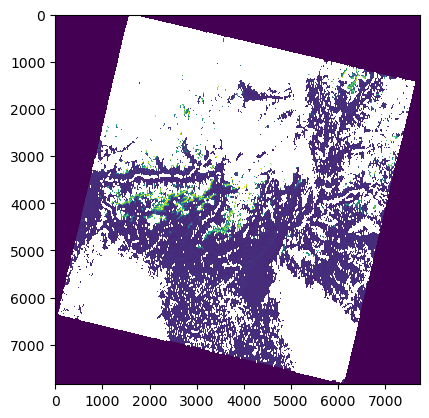

In [4]:
with rio.open('test\L8_Data\L2\stack_B2_B3_B4_B5_QA_masked.tif') as src:
    print(src.descriptions)
    print(src.tags)
    print(src.profile)
    print(src.meta)
    print(src.res)
    show(src.read(1))

In [2]:
# stack_bands('test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE',['B02','B03','B04','B08'], 'test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE\stack_B2_B3_B4_B8.tif')

stacked_raster_path = stack_bands('test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE',['B02','B03','B04','B08'])

Stacked raster saved at test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE\stacked.tif


('B02', 'B03', 'B04', 'B08')
<bound method DatasetBase.tags of <open DatasetReader name='test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE\stacked.tif' mode='r'>>
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 399960.0,
       0.0, -10.0, 5000040.0), 'blockxsize': 1

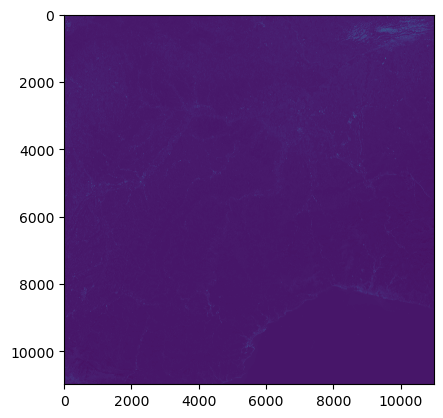

In [3]:
with rio.open(stacked_raster_path) as src:
    print(src.descriptions)
    print(src.tags)
    print(src.profile)
    print(src.meta)
    print(src.res)
    show(src.read(1))

In [12]:
stack_bands('test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE',['stack_B2_B3_B4_B8','SCL'], 'test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE\stack_B2_B3_B4_B8_SCL.tif')

Stacked raster saved at test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE\stack_B2_B3_B4_B8_SCL.tif


In [4]:
masked_path =mask_clouds_S2('test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE\stack_B2_B3_B4_B8_SCL.tif')

Trying with Cloud Probability Band (MSK_CLDPRB)
MSK_CLDPRB band not found!
Trying with Scene Classification Layer (SCL)
Using external SCL band file: 	est\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE\GRANULE\L2A_T32TMQ_A039988_20241101T102100\IMG_DATA\R20m\T32TMQ_20241101T102059_SCL_20m.jp2
An error occurred: '	est\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE\GRANULE\L2A_T32TMQ_A039988_20241101T102100\IMG_DATA\R20m\T32TMQ_20241101T102059_SCL_20m.jp2' does not exist in the file system, and is not recognized as a supported dataset name.


('B02', 'B03', 'B04', 'B08', 'SCL')
<bound method DatasetBase.tags of <open DatasetReader name='test\S2_Data\S2B_MSIL2A_20241101T102059_N0511_R065_T32TMQ_20241101T125340.SAFE\stack_B2_B3_B4_B8_SCL_masked.tif' mode='r'>>
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 10980, 'height': 10980, 'count': 5, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32632"]]'), 'transform': Affine(10.0, 0.0, 399960.0,
       0.0, -10.0,

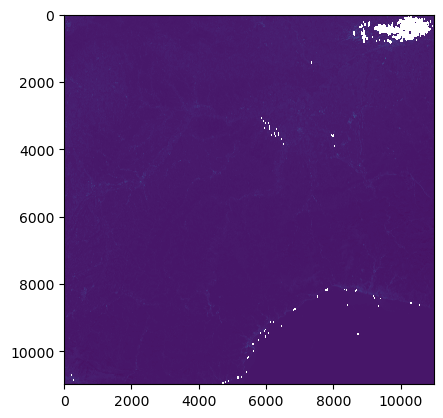

In [3]:
with rio.open(masked_path) as src:
    print(src.descriptions)
    print(src.tags)
    print(src.profile)
    print(src.meta)
    print(src.res)
    show(src.read(1))